<a href="https://colab.research.google.com/github/BEE-AI-Digital-Health/Python/blob/master/BEEIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from flask import Flask, request, render_template

app = Flask(__name__)

@app.route('/')
def index():
    return render_template('index.html')

@app.route('/submit', methods=['POST'])
def submit():
    name = request.form['name']
    age = request.form['age']
    return render_template('submit.html', name=name, age=age)

if __name__ == '__main__':
    app.run()


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


In [3]:
import sqlite3

conn = sqlite3.connect('patients.db')
c = conn.cursor()

# Crear una tabla de pacientes
c.execute('''
CREATE TABLE IF NOT EXISTS patients (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    name TEXT NOT NULL,
    age INTEGER NOT NULL,
    gender TEXT NOT NULL
)
''')

# Agregar un paciente a la tabla de pacientes
c.execute('''
INSERT INTO patients (name, age, gender)
VALUES (?, ?, ?)
''', ('John Doe', 30, 'Male'))

conn.commit()
conn.close()


In [8]:
import pandas as pd
import sqlite3
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [13]:
# Conectar a la base de datos
conn = sqlite3.connect('patients.db')
cursor = conn.cursor()

# Eliminar la tabla previamente creada
cursor.execute('DROP TABLE IF EXISTS patients')

# Crear una tabla de pacientes
cursor.execute('''
CREATE TABLE patients (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    age INTEGER NOT NULL,
    gender CHAR(10) NOT NULL,
    diagnosis CHAR(50) NOT NULL
)
''')

# Confirmar los cambios
conn.commit()

# Cerrar la conexión a la base de datos
conn.close()


In [15]:
# Abrir una conexión a la base de datos
conn = sqlite3.connect('patients.db')
cursor = conn.cursor()

# Insertar datos en la tabla de pacientes
cursor.execute('''
    INSERT INTO patients (age, gender, diagnosis)
    VALUES
        (30, 'male', 'healthy'),
        (35, 'female', 'healthy'),
        (40, 'male', 'sick'),
        (45, 'female', 'sick')
''')

# Guardar los cambios
conn.commit()

# Cerrar la conexión a la base de datos
conn.close()


In [16]:
# Leer los datos de los pacientes desde la base de datos
conn = sqlite3.connect('patients.db')
df = pd.read_sql_query('SELECT * FROM patients', conn)


In [18]:
X_train = pd.get_dummies(X_train, columns=['gender'])
X_test = pd.get_dummies(X_test, columns=['gender'])


In [19]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [20]:
from flask import Flask, request, render_template
import numpy as np

app = Flask(__name__)
model = LogisticRegression()
model.fit(X_train, y_train)

@app.route("/", methods=["GET", "POST"])
def index():
    if request.method == "POST":
        age = float(request.form["age"])
        gender = request.form["gender"]
        if gender == "male":
            gender = 1
        else:
            gender = 0
        prediction = model.predict([[age, gender]])[0]
        return render_template("index.html", prediction=prediction)
    return render_template("index.html")

if __name__ == "__main__":
    app.run()


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


In [26]:
import pandas as pd

# Ejemplo de verificación de existencia de columna antes de acceder a ella
df = pd.DataFrame({'name': ['John', 'Jane', 'Jim'], 'age': [30, 31, 32]})
if 'gender' in df.columns:
    print(df['gender'])
else:
    print("La columna 'gender' no existe en el DataFrame")

# Ejemplo de creación de columna antes de acceder a ella
df['gender'] = ['male', 'female', 'male']
print(df['gender'])


La columna 'gender' no existe en el DataFrame
0      male
1    female
2      male
Name: gender, dtype: object


In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


In [28]:
df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv")


In [29]:
X = df.values[:, :-1]
y = df.values[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)


In [30]:
le = LabelEncoder()
X_train[:, 1] = le.fit_transform(X_train[:, 1])
X_test[:, 1] = le.transform(X_test[:, 1])


In [31]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100), '%')


Accuracy: 89.66 %


In [32]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv")

X = df.values[:, :-1]
y = df.values[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

le = LabelEncoder()
X_train[:, 1] = le.fit_transform(X_train[:, 1])
X_test[:, 1] = le.transform(X_test[:, 1])

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % (accuracy*100), '%')


Accuracy: 89.66 %


In [33]:
from sklearn.linear_model import LogisticRegression


In [34]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)


LogisticRegression()

In [35]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[31 11]
 [ 1 73]]


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [37]:
from sklearn.tree import DecisionTreeClassifier

# Creación del modelo de clasificación
classifier = DecisionTreeClassifier()

# Entrenamiento del modelo
classifier.fit(X_train, y_train)

# Predicción de resultados
y_pred = classifier.predict(X_test)


In [38]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Cálculo de la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Cálculo del puntaje de precisión
accuracy = accuracy_score(y_test, y_pred)


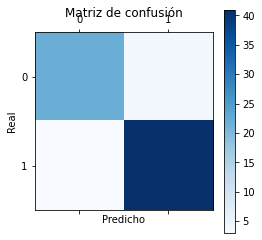

Precisión:  0.9


In [39]:
import matplotlib.pyplot as plt

# Visualización de la matriz de confusión
plt.matshow(cm, cmap=plt.cm.Blues)
plt.title("Matriz de confusión")
plt.colorbar()
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

# Visualización del puntaje de precisión
print("Precisión: ", accuracy)


In [43]:
import os

os.environ['DISPLAY'] = ':0'


In [45]:
import pandas as pd

# Crear un DataFrame a partir de los datos
data = {'Name': ['John', 'Jane', 'Jim', 'Joan'],
        'Age': [34, 29, 41, 38],
        'Gender': ['Male', 'Female', 'Male', 'Female']}
df = pd.DataFrame(data)

# Mostrar la tabla de datos
print(df)


   Name  Age  Gender
0  John   34    Male
1  Jane   29  Female
2   Jim   41    Male
3  Joan   38  Female


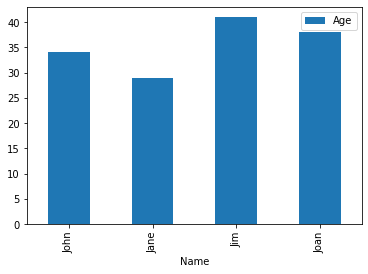

In [46]:
import matplotlib.pyplot as plt

# Crear un gráfico de barras con los datos
df.plot(kind='bar', x='Name', y='Age')

# Mostrar el gráfico
plt.show()


In [48]:
!pip install ipywidgets

import ipywidgets as widgets
from IPython.display import display

# Create a button widget
button = widgets.Button(description="Click Me!")

# Define a function to be called when the button is clicked
def on_button_clicked(b):
    print("Button was clicked!")

# Connect the button to the function
button.on_click(on_button_clicked)

# Display the button
display(button)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Button(description='Click Me!', style=ButtonStyle())

In [49]:
!pip install ipywidgets

import ipywidgets as widgets
from IPython.display import display

# Create a text widget
text = widgets.Text(description="Ingresa tu nombre:")

# Create a button widget
button = widgets.Button(description="Presiona aquí")

# Create a function to handle button clicks
def handle_submit(sender):
    print(f"Hola, {text.value}")

# Connect the button to the function
button.on_click(handle_submit)

# Display the widgets
display(text, button)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Text(value='', description='Ingresa tu nombre:')

Button(description='Presiona aquí', style=ButtonStyle())

Hola, Mario Benedetti
